In [ ]:
# Name: Suraj Yogesh Yeola
# Class: TY B BTech
# Branch: Computer Engineering
# Roll Number: 69
# Assignment 05 DSBDL

!pip install kagglehub

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
path = kagglehub.dataset_download("adityaw2604/social-network-adscsv")
print("Path to dataset files:", path)

100%|██████████| 1.46k/1.46k [00:00<00:00, 2.93MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adityaw2604/social-network-adscsv/versions/1


In [ ]:
df = pd.read_csv(f"{path}/Social_Network_Ads.csv")

In [ ]:
print(df.head())
print(df.info())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [ ]:
print(df.head())  # View first few rows
print(df.columns)  # View column names
print(df.shape)  # View dataset dimensions

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')
(400, 3)


In [ ]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy: 0.86

Confusion Matrix:
 [[61  2]
 [12 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



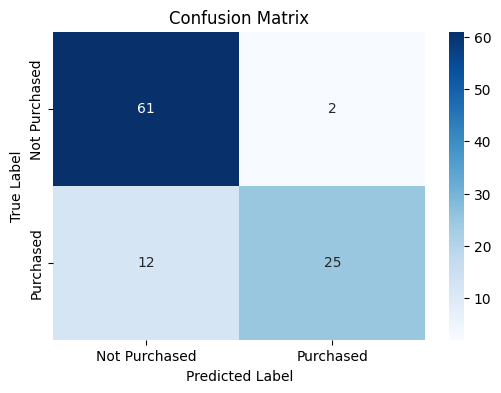

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()